<a href="https://colab.research.google.com/github/shnrndk/IP-Cat-Research/blob/CDF-PDF/PDF_and_CDF_Create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp  /content/drive/MyDrive/final_dataset.zip /content/

In [ ]:
!unzip  final_dataset.zip

Archive:  final_dataset.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [134]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4['vendor']= ['vpn' for x in range(df3.shape[0])]
df4 = df4.sample(n = 9200)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
df = df.append([df1,df2,df3,df4],ignore_index=True)

In [136]:
df

,ip,No Of Owners,CIDR,netType,Organization,Most Recent Update,No of Who is Records,data.http.result.response.headers.server.0,data.http.result.response.status_code,data.http.result.response.headers.unknown.0.key,data.http.result.response.headers.unknown.0.value.0,data.http.result.response.headers.connection.0,data.http.result.response.headers.via.0,data.http.result.response.headers.unknown.1.key,data.http.result.response.headers.unknown.1.value.0,data.http.result.response.headers.accept_ranges.0,data.http.result.response.headers.cache_control.0,data.http.result.response.headers.retry_after.0,data.http.result.response.body,data.http.result.response.body_sha256,data.http.result.response.content_length,data.http.result.response.headers.content_type.0,data.http.result.response.headers.location.0,data.http.result.redirect_response_chain.0.status_line,data.http.result.response.headers.etag.0,data.http.result.response.headers.last_modified.0,data.http.result.response.headers.vary.0,data.http.result.response.transfer_encoding.0,data.http.result.response.headers.x_powered_by.0,data.http.result.response.headers.pragma.0,data.http.result.redirect_response_chain.0.headers.server.0,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names,vendor,Unnamed: 0_y
0,52.84.119.7,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMAZON-02 - Amazon.com, Inc.",16509,success,['Go Daddy Secure Certificate Authority - G2'],['US'],"['GoDaddy.com, Inc.']","C=US, ST=Arizona, L=Scottsdale, O=GoDaddy.com,...",['*.memestech.co'],NaN,NaN,NaN,NaN,CN=*.memestech.co,"['*.memestech.co', 'memestech.co']",cdn,NaN
1,13.227.246.29,0.0,NaN,NaN,NaN,NaN,1.0,CloudFront,403.0,x_cache,Error from cloudfront,keep-alive,1.1 dd96101693c9f13a5efc3b0280199939.cloudfron...,x_amz_cf_id,-PFuTwKxIdQThIHUQGvHO10CCgNtrBEAOO3HigMJQxMrkf...,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",fb4d36449089ee0ca8ce920ac3450106972a672e12067c...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cdn,NaN
2,13.226.139.197,3.0,13.224.0.0/14,Reallocated,Amazon Technologies Inc.,1.585613e+09,3.0,CloudFront,403.0,x_amz_cf_pop,YTO50-C2,keep-alive,1.1 f7bff5f69cd52bcb4195512c22171b52.cloudfron...,x_amz_cf_id,_yWi2zPGH83eZQ_1X5dcM9PgxGoZ144D1t-25XD2rf5B8z...,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",b6981709317d7ddde5cb0537550f450de5c3ba02e4248a...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cdn,NaN
3,13.224.37.237,NaN,NaN,NaN,NaN,NaN,0.0,CloudFront,403.0,x_amz_cf_pop,YTO50-C1,keep-alive,1.1 a76a40b05a00844b502c99a4874fc37e.cloudfron...,x_cache,Error from cloudfront,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",538f7d4bd5b03649c79c77be8b7fb12a25e5401d043549...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMAZON-02 - Amazon.com, Inc.",16509,success,['Amazon'],['US'],['Amazon'],"C=US, O=Amazon, OU=Se

In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

In [ ]:
def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

In [ ]:
def getgeneralphp(x):
  if (pd.isna(x)):
    return "0"
  else:
    if('PHP' in x):
      return 'PHP'

In [ ]:
def changenullaszero(x):
  if (pd.isna(x)): 
    return "0"
  else:
    return "1"

In [ ]:
def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

In [137]:
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)

In [138]:
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)
df['data.http.result.response.headers.via.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after.0'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location.0'] = df['data.http.result.response.headers.location.0'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.0.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag.0'] = df['data.http.result.response.headers.etag.0'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified.0']  = df['data.http.result.response.headers.last_modified.0'].apply(changenullaszero)
df['data.http.result.response.headers.vary.0'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by.0'].fillna(-1, inplace=True)
df['data.http.result.redirect_response_chain.0.headers.server.0'].fillna(-1, inplace=True)
df = df.drop(['data.http.result.redirect_response_chain.0.headers.server.0'],axis=1)
df['data.http.result.response.headers.server.0']  = df['data.http.result.response.headers.server.0'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server.0'].fillna(-1, inplace=True)

In [139]:
df['data.http.result.response.headers.server.0'] = le.fit_transform(df['data.http.result.response.headers.server.0'].astype(str))
df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
df['data.http.result.response.headers.connection.0'] = le.fit_transform(df['data.http.result.response.headers.connection.0'].astype(str))
df['data.http.result.response.headers.via.0'] = le.fit_transform(df['data.http.result.response.headers.via.0'].astype(str))
df['data.http.result.response.headers.accept_ranges.0'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges.0'].astype(str))
df['data.http.result.response.headers.cache_control.0'] = le.fit_transform(df['data.http.result.response.headers.cache_control.0'].astype(str))
df['data.http.result.response.headers.retry_after.0'] = le.fit_transform(df['data.http.result.response.headers.retry_after.0'].astype(str))
df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
df['data.http.result.response.headers.content_type.0'] = le.fit_transform(df['data.http.result.response.headers.content_type.0'].astype(str))

df['data.http.result.response.headers.location.0'] = le.fit_transform(df['data.http.result.response.headers.location.0'].astype(str))
df['data.http.result.redirect_response_chain.0.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.0.status_line'].astype(str))
df['data.http.result.response.headers.etag.0'] = le.fit_transform(df['data.http.result.response.headers.etag.0'].astype(str))
df['data.http.result.response.headers.last_modified.0'] = le.fit_transform(df['data.http.result.response.headers.last_modified.0'].astype(str))
df['data.http.result.response.headers.vary.0'] = le.fit_transform(df['data.http.result.response.headers.vary.0'].astype(str))
df['data.http.result.response.transfer_encoding.0'] = le.fit_transform(df['data.http.result.response.transfer_encoding.0'].astype(str))

df['data.http.result.response.headers.x_powered_by.0'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by.0'].astype(str))
df['data.http.result.response.headers.pragma.0'] = le.fit_transform(df['data.http.result.response.headers.pragma.0'].astype(str))
df['as_name'] = le.fit_transform(df['as_name'].astype(str))

df['as_no'] = le.fit_transform(df['as_no'].astype(str))
df['vendor'] = le.fit_transform(df['vendor'].astype(str))



In [140]:
df

,ip,No Of Owners,CIDR,netType,Organization,Most Recent Update,No of Who is Records,data.http.result.response.headers.server.0,data.http.result.response.status_code,data.http.result.response.headers.unknown.0.key,data.http.result.response.headers.unknown.0.value.0,data.http.result.response.headers.connection.0,data.http.result.response.headers.via.0,data.http.result.response.headers.unknown.1.key,data.http.result.response.headers.unknown.1.value.0,data.http.result.response.headers.accept_ranges.0,data.http.result.response.headers.cache_control.0,data.http.result.response.headers.retry_after.0,data.http.result.response.body,data.http.result.response.body_sha256,data.http.result.response.content_length,data.http.result.response.headers.content_type.0,data.http.result.response.headers.location.0,data.http.result.redirect_response_chain.0.status_line,data.http.result.response.headers.etag.0,data.http.result.response.headers.last_modified.0,data.http.result.response.headers.vary.0,data.http.result.response.transfer_encoding.0,data.http.result.response.headers.x_powered_by.0,data.http.result.response.headers.pragma.0,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names,vendor,Unnamed: 0_y
0,52.84.119.7,NaN,NaN,NaN,NaN,NaN,0.0,1,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0.0,2,0,0,0,0,2,0,0,0,5,17,success,['Go Daddy Secure Certificate Authority - G2'],['US'],"['GoDaddy.com, Inc.']","C=US, ST=Arizona, L=Scottsdale, O=GoDaddy.com,...",['*.memestech.co'],NaN,NaN,NaN,NaN,CN=*.memestech.co,"['*.memestech.co', 'memestech.co']",0,NaN
1,13.227.246.29,0.0,NaN,NaN,NaN,NaN,1.0,55,14,x_cache,Error from cloudfront,6,52,x_amz_cf_id,-PFuTwKxIdQThIHUQGvHO10CCgNtrBEAOO3HigMJQxMrkf...,0,0,0,1,1,915.0,47,0,0,0,0,2,0,0,0,105,106,unknown-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,13.226.139.197,3.0,13.224.0.0/14,Reallocated,Amazon Technologies Inc.,1.585613e+09,3.0,55,14,x_amz_cf_pop,YTO50-C2,6,52,x_amz_cf_id,_yWi2zPGH83eZQ_1X5dcM9PgxGoZ144D1t-25XD2rf5B8z...,0,0,0,1,1,915.0,47,0,0,0,0,2,0,0,0,105,106,unknown-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,13.224.37.237,NaN,NaN,NaN,NaN,NaN,0.0,55,14,x_amz_cf_pop,YTO50-C1,6,52,x_cache,Error from cloudfront,0,0,0,1,1,915.0,47,0,0,0,0,2,0,0,0,5,17,success,['Amazon'],['US'],['Amazon'],"C=US, O=Amazon, OU=Server CA 1B, CN=Amazon",['*.awsapps.com'],NaN,NaN,NaN,NaN,CN=*.awsapps.com,"['*.awsapps.com', '*.awsapps.net']",0,NaN
4,54.230.51.197,2.0,54.230.0.0/15,Reassigned,Amazon Technologies Inc.,1.586218e+09,3.0,55,14,x_cache,Error from cloudfront,6,52,x_amz_cf_id,dwi8aXW-ficqvcWwaORN-qon16JmHiqyiEOmmrnP0ordwi...,0,0,0,1,1,915.0,47,0,0,0,0,2,0,0,0,5,17,success,['Amazon'],['US'],['Amazon'],"C=US, O=Amazon, OU=Server CA 1B, CN=Amazon",['*.cloudfront.net'],NaN,NaN,NaN,NaN,CN=*.cloudfront.net,"['cloudfront.net', '*.cloudfront.net']",0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114195,82.114.70.46,1.0,82.0.0.0/8,Allocated to RIPE NCC,RIPE 

In [141]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [142]:
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)

In [143]:
df['No of Who is Records'].count()

114060

In [144]:
df = df.dropna(subset=['No of Who is Records'])

In [ ]:
df["Net Size"] = df["CIDR"].apply(getCIDRBlockLength)

In [ ]:
df['CIDR']

3         151.101.0.0/16
5           13.35.0.0/16
7          54.224.0.0/12
8           52.84.0.0/15
9          13.249.0.0/16
               ...      
114189       103.0.0.0/8
114192       112.0.0.0/8
114195       116.0.0.0/8
114196     98.162.0.0/17
114198        46.0.0.0/8
Name: CIDR, Length: 77040, dtype: object

In [ ]:
df['No Of Owners'].count()

77040

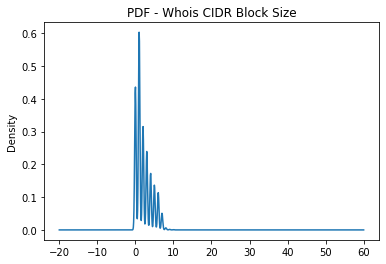

In [145]:
df['No of Who is Records'].plot.kde(title='PDF - Whois CIDR Block Size')

In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
       'data.http.result.redirect_response_chain.0.status_line',
       'data.http.result.response.headers.etag.0',
       'data.http.result.response.headers.last_modified.0',
       'data.http.result.response.headers.vary.0',
       'data.htt

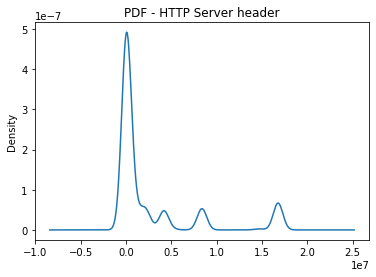

In [ ]:
df['Net Size'].plot.kde(title='PDF - HTTP Server header')

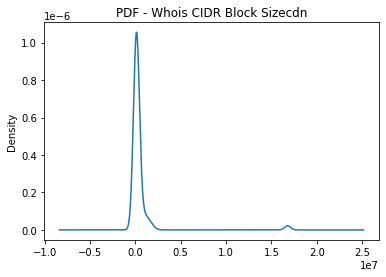

In [ ]:
df[df["vendor"] == 0]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[0])

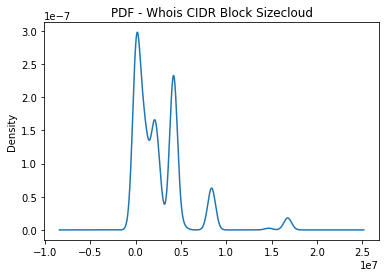

In [ ]:
df[df["vendor"] == 1]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[1])

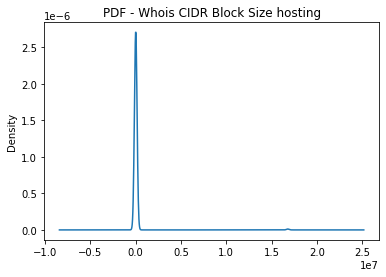

In [ ]:
df[df["vendor"] == 2]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size '+le.classes_[2])

In [ ]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['Net Size'].values, bins=100000)

In [ ]:
pdf = count / sum(count)

In [ ]:
cdf = np.cumsum(pdf)

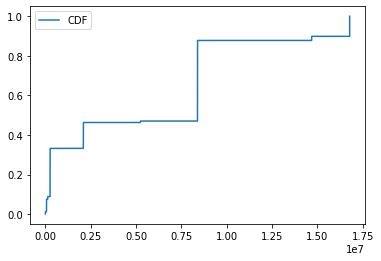

In [ ]:
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

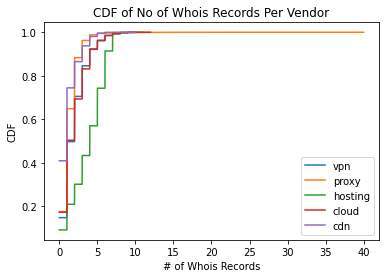

In [156]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('CDF of No of Whois Records Per Vendor')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')
plt.savefig('No Of Whois Records Per Vendor.png')

No handles with labels found to put in legend.


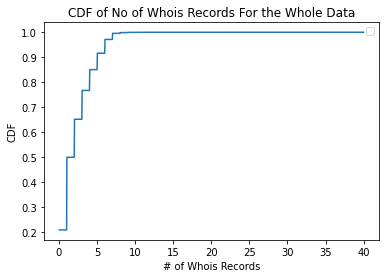

In [158]:
count, bins_count  = np.histogram(df['No of Who is Records'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf)
plt.legend()
plt.title('CDF of No of Whois Records For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')
plt.savefig('No Of Whois Records Whole.png')

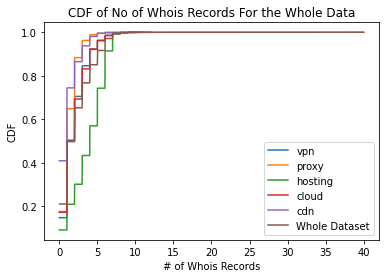

In [159]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['No of Who is Records'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('CDF of No of Whois Records Per Vendor')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')

count, bins_count  = np.histogram(df['No of Who is Records'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label = "Whole Dataset")
plt.legend()
plt.title('CDF of No of Whois Records For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')
plt.savefig('No Of Whois Records Merged.png')

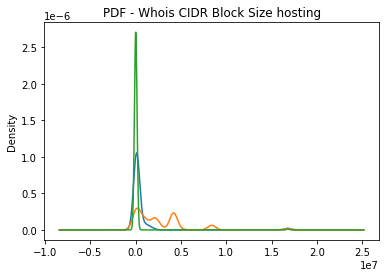

In [ ]:
df[df["vendor"] == 0]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[0])
df[df["vendor"] == 1]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[1])
df[df["vendor"] == 2]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size '+le.classes_[2])


In [ ]:
df[df["vendor"] == 3]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[3])
df[df["vendor"] == 4]['Net Size'].plot.kde(title='PDF - Whois CIDR Block Size'+le.classes_[4])

AttributeError: ignored

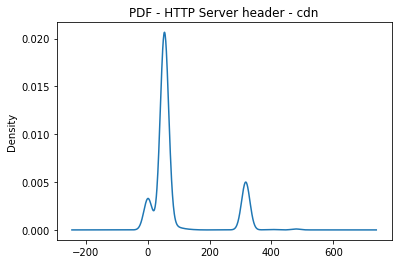

In [ ]:
df[df["vendor"] == 0]["data.http.result.response.headers.server.0"].plot.kde(title='PDF - HTTP Server header - '+le.classes_[0])

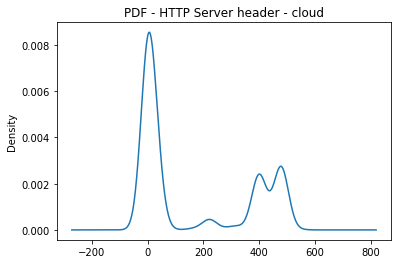

In [ ]:
df[df["vendor"] == 1]["data.http.result.response.headers.server.0"].plot.kde(title='PDF - HTTP Server header - '+le.classes_[1])

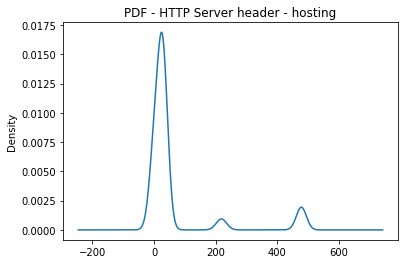

In [ ]:
df[df["vendor"] == 2]["data.http.result.response.headers.server.0"].plot.kde(title='PDF - HTTP Server header - '+le.classes_[2])

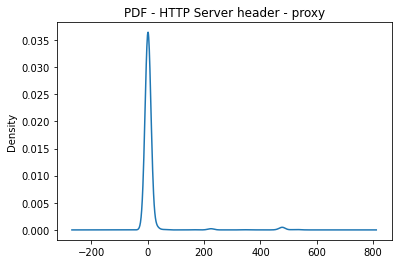

In [ ]:
df[df["vendor"] == 3]["data.http.result.response.headers.server.0"].plot.kde(title='PDF - HTTP Server header - '+le.classes_[3])

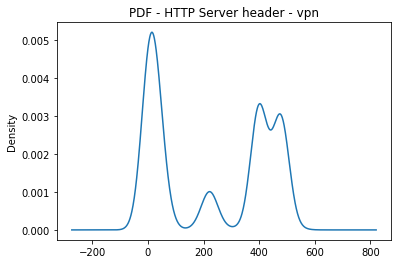

In [ ]:
df[df["vendor"] == 4]["data.http.result.response.headers.server.0"].plot.kde(title='PDF - HTTP Server header - '+le.classes_[4])